In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 300)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
from jj_dummification import *

In [3]:
housing = HousingCategorical()


In [4]:
housing = housing.df

In [12]:
housing.loc[(housing.SaleType == 'New'),'SaleType'].count()
housing.loc[(housing.SaleCondition == 'Partial'),'SaleType'].count()

housing.loc[(housing.SaleCondition == 'Partial')&(housing.SaleType=='New'),'SaleType'].count()

122

125

122

In [5]:
housing.shape

(1460, 78)

In [6]:
#list to contain outlier IDs and the column they are removed for
outlier_id = {}

In [7]:
continuous = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','1stFlrSF',
             '2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
             'ScreenPorch','PoolArea','MiscVal','YearBuilt','YearRemodAdd','GarageYrBlt']

In [8]:
#creating generator function for iterating through my feature sets for plotting

def generator(list):
    i = 0
    while i != len(list):
        yield list[i]
        i+=1

In [9]:
gen_continuous = generator(continuous)

Text(0.5, 0, 'LotFrontage')

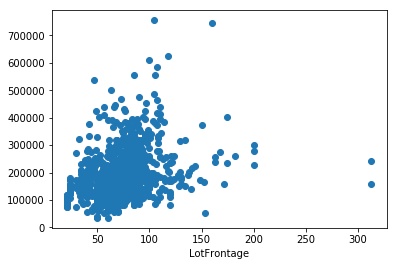

In [10]:
column_name = next(gen_continuous)
plt.scatter(housing[column_name], housing['SalePrice'])
plt.xlabel(column_name)

In [11]:
housing[housing.LotFrontage > 250]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
935,20,RL,313.000,27650,Pave,No_Alley,IR2,HLS,Inside,Mod,NAmes,PosA,Norm,1Fam,1Story,7,7,1960,2007,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.000,TA,TA,CBlock,Gd,TA,Gd,GLQ,425,Unf,0,160,GasA,Ex,Y,SBrkr,2069,0,0,2069,1,0,2,0,4,1,Gd,9,Typ,1,Gd,Attchd,1960.000,RFn,2,505,TA,TA,Y,0,0,0,0,0,0,No_Pool,No_Fence,No_MF,0,11,2008,WD,Normal,242000
1299,60,RL,313.000,63887,Pave,No_Alley,IR3,Bnk,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.000,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.000,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,No_Fence,No_MF,0,1,2008,New,Partial,160000


In [12]:
outlier_id[935] = 'LotFrontage'
outlier_id[1299] = 'LotFrontage'
outlier_id

{935: 'LotFrontage', 1299: 'LotFrontage'}

Text(0.5, 0, 'LotArea')

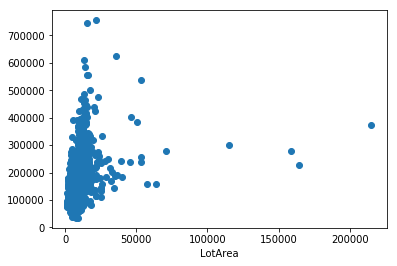

In [13]:
column_name = next(gen_continuous)
plt.scatter(housing[column_name], housing['SalePrice'])
plt.xlabel(column_name)

In [14]:
housing[housing.LotArea > 100000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
250,50,RL,200.000,159000,Pave,No_Alley,IR2,Low,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.000,Gd,TA,CBlock,Gd,TA,Gd,Rec,697,Unf,0,747,GasA,Gd,Y,SBrkr,1444,700,0,2144,0,1,2,0,4,1,Gd,7,Typ,2,TA,Attchd,1958.000,Fin,2,389,TA,TA,Y,0,98,0,0,0,0,No_Pool,No_Fence,Shed,500,6,2007,WD,Normal,277000
314,20,RL,150.000,215245,Pave,No_Alley,IR3,Low,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,1965,Hip,CompShg,BrkFace,BrkFace,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236,Rec,820,80,GasW,TA,Y,SBrkr,2036,0,0,2036,2,0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1965.000,RFn,2,513,TA,TA,Y,0,0,0,0,0,0,No_Pool,No_Fence,No_MF,0,6,2009,WD,Normal,375000
336,190,RL,200.000,164660,Grvl,No_Alley,IR1,HLS,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,1965,1965,Gable,CompShg,Plywood,Plywood,None,0.000,TA,TA,CBlock,TA,TA,Gd,ALQ,1249,BLQ,147,103,GasA,Ex,Y,SBrkr,1619,167,0,1786,2,0,2,0,3,1,TA,7,Typ,2,Gd,Attchd,1965.000,Fin,2,529,TA,TA,Y,670,0,0,0,0,0,No_Pool,No_Fence,Shed,700,8,2008,WD,Normal,228950
707,20,RL,200.000,115149,Pave,No_Alley,IR2,Low,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.000,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219,Unf,0,424,GasA,TA,Y,SBrkr,1824,0,0,1824,1,0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1971.000,Unf,2,739,TA,TA,Y,380,48,0,0,0,0,No_Pool,No_Fence,No_MF,0,6,2007,WD,Normal,302000


In [15]:
outlier_id[250]= 'LotArea'
outlier_id[314]= 'LotArea'
outlier_id[336]= 'LotArea'
outlier_id[707]= 'LotArea'
outlier_id

{935: 'LotFrontage',
 1299: 'LotFrontage',
 250: 'LotArea',
 314: 'LotArea',
 336: 'LotArea',
 707: 'LotArea'}

Text(0.5, 0, 'MasVnrArea')

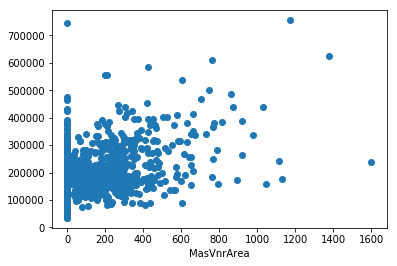

In [16]:
column_name = next(gen_continuous)
plt.scatter(housing[column_name], housing['SalePrice'])
plt.xlabel(column_name)

In [17]:
housing[housing.MasVnrArea >1300]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
298,60,FV,66.000,7399,Pave,Pave,IR1,Lvl,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,1997,1998,Hip,CompShg,VinylSd,VinylSd,BrkFace,1600.000,Gd,TA,PConc,Gd,TA,No,BLQ,649,Unf,0,326,GasA,Ex,Y,SBrkr,975,975,0,1950,0,0,2,1,3,1,Gd,7,Typ,1,TA,Detchd,1997.000,RFn,2,576,TA,TA,Y,0,10,0,0,198,0,No_Pool,No_Fence,No_MF,0,6,2007,WD,Normal,239000
1170,60,RL,118.000,35760,Pave,No_Alley,IR1,Lvl,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.000,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387,Unf,0,543,GasA,Ex,Y,SBrkr,1831,1796,0,3627,1,0,3,1,4,1,Gd,10,Typ,1,TA,Attchd,1995.000,Fin,3,807,TA,TA,Y,361,76,0,0,0,0,No_Pool,No_Fence,No_MF,0,7,2006,WD,Normal,625000


In [18]:
outlier_id[298]='MasVnrArea'
outlier_id[1170]='MasVnrArea'
outlier_id

{935: 'LotFrontage',
 1299: 'LotFrontage',
 250: 'LotArea',
 314: 'LotArea',
 336: 'LotArea',
 707: 'LotArea',
 298: 'MasVnrArea',
 1170: 'MasVnrArea'}

Text(0.5, 0, 'BsmtFinSF1')

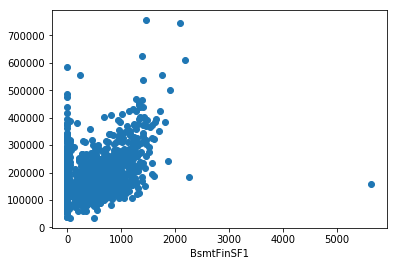

In [19]:
column_name = next(gen_continuous)
plt.scatter(housing[column_name], housing['SalePrice'])
plt.xlabel(column_name)

In [20]:
housing[housing.BsmtFinSF1>5000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1299,60,RL,313.000,63887,Pave,No_Alley,IR3,Bnk,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.000,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.000,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,No_Fence,No_MF,0,1,2008,New,Partial,160000


In [21]:
outlier_id[1299] = ['LotFrontage','BsmtFinSF1']
outlier_id

{935: 'LotFrontage',
 1299: ['LotFrontage', 'BsmtFinSF1'],
 250: 'LotArea',
 314: 'LotArea',
 336: 'LotArea',
 707: 'LotArea',
 298: 'MasVnrArea',
 1170: 'MasVnrArea'}

Text(0.5, 0, 'BsmtFinSF2')

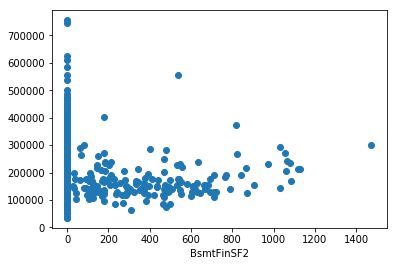

In [22]:
column_name = next(gen_continuous)
plt.scatter(housing[column_name], housing['SalePrice'])
plt.xlabel(column_name)

Text(0.5, 0, 'BsmtUnfSF')

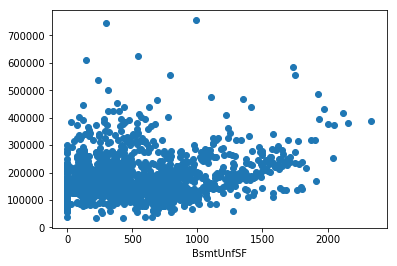

In [23]:
column_name = next(gen_continuous)
plt.scatter(housing[column_name], housing['SalePrice'])
plt.xlabel(column_name)

Text(0.5, 0, '1stFlrSF')

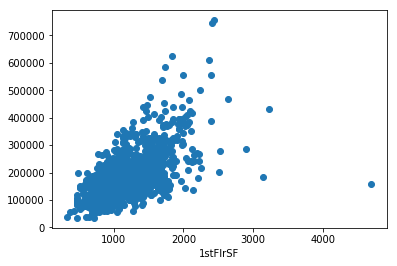

In [24]:
column_name = next(gen_continuous)
plt.scatter(housing[column_name], housing['SalePrice'])
plt.xlabel(column_name)

In [25]:
housing[housing['1stFlrSF']>4000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1299,60,RL,313.000,63887,Pave,No_Alley,IR3,Bnk,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.000,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.000,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,No_Fence,No_MF,0,1,2008,New,Partial,160000


In [26]:
outlier_id[1299].append('1stFlrSF')
outlier_id

{935: 'LotFrontage',
 1299: ['LotFrontage', 'BsmtFinSF1', '1stFlrSF'],
 250: 'LotArea',
 314: 'LotArea',
 336: 'LotArea',
 707: 'LotArea',
 298: 'MasVnrArea',
 1170: 'MasVnrArea'}

Text(0.5, 0, '2ndFlrSF')

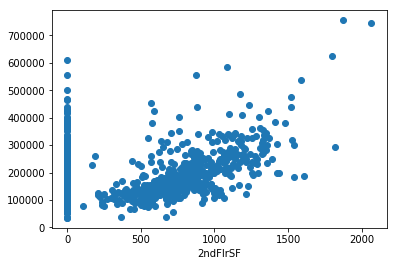

In [27]:
column_name = next(gen_continuous)
plt.scatter(housing[column_name], housing['SalePrice'])
plt.xlabel(column_name)

Text(0.5, 0, 'LowQualFinSF')

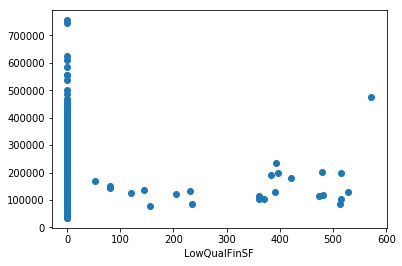

In [28]:
column_name = next(gen_continuous)
plt.scatter(housing[column_name], housing['SalePrice'])
plt.xlabel(column_name)

In [29]:
housing[housing.LowQualFinSF>550]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
186,75,RM,90.000,22950,Pave,No_Alley,IR2,Lvl,Inside,Gtl,OldTown,Artery,Norm,1Fam,2.5Fin,10,9,1892,1993,Gable,WdShngl,Wd Sdng,Wd Sdng,None,0.000,Gd,Gd,BrkTil,TA,TA,Mn,Unf,0,Unf,0,1107,GasA,Ex,Y,SBrkr,1518,1518,572,3608,0,0,2,1,4,1,Ex,12,Typ,2,TA,Detchd,1993.000,Unf,3,840,Ex,TA,Y,0,260,0,0,410,0,No_Pool,GdPrv,No_MF,0,6,2006,WD,Normal,475000


In [30]:
outlier_id[186] = 'LowQualFinSF'
outlier_id
len(outlier_id)

{935: 'LotFrontage',
 1299: ['LotFrontage', 'BsmtFinSF1', '1stFlrSF'],
 250: 'LotArea',
 314: 'LotArea',
 336: 'LotArea',
 707: 'LotArea',
 298: 'MasVnrArea',
 1170: 'MasVnrArea',
 186: 'LowQualFinSF'}

9

Text(0.5, 0, 'GrLivArea')

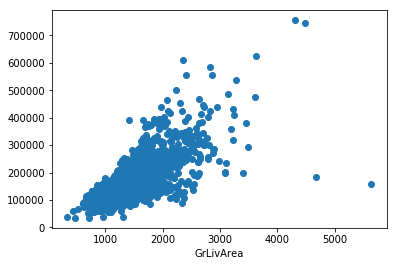

In [31]:
column_name = next(gen_continuous)
plt.scatter(housing[column_name], housing['SalePrice'])
plt.xlabel(column_name)

In [32]:
housing[(housing.GrLivArea>4000)&(housing.SalePrice<300000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
524,60,RL,130.000,40094,Pave,No_Alley,IR1,Bnk,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CemntBd,Stone,762.000,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.000,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,No_Pool,No_Fence,No_MF,0,10,2007,New,Partial,184750
1299,60,RL,313.000,63887,Pave,No_Alley,IR3,Bnk,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.000,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.000,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,No_Fence,No_MF,0,1,2008,New,Partial,160000


In [33]:
outlier_id[1299].append('GrLivArea')
outlier_id[524] = 'GrLivArea'
outlier_id

{935: 'LotFrontage',
 1299: ['LotFrontage', 'BsmtFinSF1', '1stFlrSF', 'GrLivArea'],
 250: 'LotArea',
 314: 'LotArea',
 336: 'LotArea',
 707: 'LotArea',
 298: 'MasVnrArea',
 1170: 'MasVnrArea',
 186: 'LowQualFinSF',
 524: 'GrLivArea'}

Text(0.5, 0, 'GarageArea')

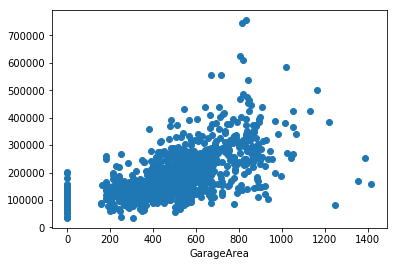

In [34]:
column_name = next(gen_continuous)
plt.scatter(housing[column_name], housing['SalePrice'])
plt.xlabel(column_name)

In [35]:
outlier_id

{935: 'LotFrontage',
 1299: ['LotFrontage', 'BsmtFinSF1', '1stFlrSF', 'GrLivArea'],
 250: 'LotArea',
 314: 'LotArea',
 336: 'LotArea',
 707: 'LotArea',
 298: 'MasVnrArea',
 1170: 'MasVnrArea',
 186: 'LowQualFinSF',
 524: 'GrLivArea'}

In [36]:
housing[(housing.GarageArea>1200)&(housing.SalePrice<300000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
582,20,RL,98.000,12704,Pave,No_Alley,Reg,Lvl,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,BrkFace,306.000,Ex,TA,PConc,Ex,TA,No,Unf,0,Unf,0,2042,GasA,Ex,Y,SBrkr,2042,0,0,2042,0,0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2009.000,RFn,3,1390,TA,TA,Y,0,90,0,0,0,0,No_Pool,No_Fence,No_MF,0,8,2009,New,Partial,253293
1062,30,C (all),120.000,18000,Grvl,No_Alley,Reg,Low,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,4,1935,1950,Gable,CompShg,MetalSd,MetalSd,None,0.000,Fa,TA,CBlock,TA,TA,No,Unf,0,Unf,0,894,GasA,TA,Y,SBrkr,894,0,0,894,0,0,1,0,2,1,TA,6,Typ,0,No_FP,Detchd,1994.000,RFn,3,1248,TA,TA,Y,0,20,0,0,0,0,No_Pool,No_Fence,Shed,560,8,2008,ConLD,Normal,81000
1191,190,RL,118.562,32463,Pave,No_Alley,Reg,Low,Inside,Mod,Mitchel,Norm,Norm,2fmCon,1Story,4,4,1961,1975,Gable,CompShg,MetalSd,MetalSd,Stone,149.000,TA,Gd,CBlock,TA,TA,Av,BLQ,1159,Unf,0,90,GasA,Ex,Y,SBrkr,1622,0,0,1622,1,0,1,0,3,1,TA,7,Typ,1,TA,2Types,1975.000,Fin,4,1356,TA,TA,Y,439,0,0,0,0,0,No_Pool,No_Fence,No_MF,0,3,2007,WD,Normal,168000
1299,60,RL,313.000,63887,Pave,No_Alley,IR3,Bnk,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.000,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.000,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,No_Fence,No_MF,0,1,2008,New,Partial,160000


In [37]:
outlier_id[1299].append('GarageArea')
outlier_id[582] = 'GarageArea'
outlier_id[1062] = 'GarageArea'
outlier_id[1191] = 'GarageArea'
len(outlier_id)
outlier_id

13

{935: 'LotFrontage',
 1299: ['LotFrontage', 'BsmtFinSF1', '1stFlrSF', 'GrLivArea', 'GarageArea'],
 250: 'LotArea',
 314: 'LotArea',
 336: 'LotArea',
 707: 'LotArea',
 298: 'MasVnrArea',
 1170: 'MasVnrArea',
 186: 'LowQualFinSF',
 524: 'GrLivArea',
 582: 'GarageArea',
 1062: 'GarageArea',
 1191: 'GarageArea'}

Text(0.5, 0, 'WoodDeckSF')

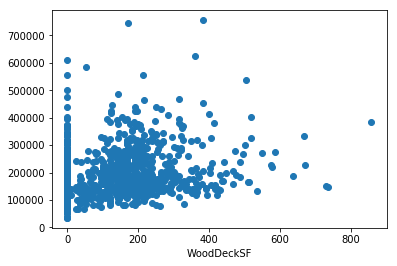

In [38]:
column_name = next(gen_continuous)
plt.scatter(housing[column_name], housing['SalePrice'])
plt.xlabel(column_name)

In [39]:
housing[housing.WoodDeckSF>800]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
54,20,RL,68.000,50271,Pave,No_Alley,IR1,Low,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,9,5,1981,1987,Gable,WdShngl,WdShing,Wd Shng,None,0.000,Gd,TA,CBlock,Ex,TA,Gd,GLQ,1810,Unf,0,32,GasA,Gd,Y,SBrkr,1842,0,0,1842,2,0,0,1,0,1,Gd,5,Typ,1,Gd,Attchd,1981.000,Fin,3,894,TA,TA,Y,857,72,0,0,0,0,No_Pool,No_Fence,No_MF,0,11,2006,WD,Normal,385000


In [40]:
outlier_id[54]='WoodDeckSF'

Text(0.5, 0, 'OpenPorchSF')

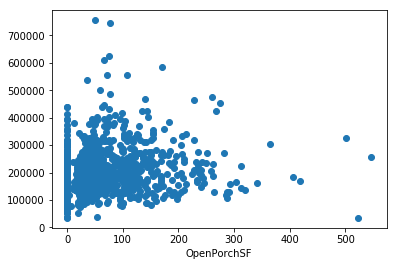

In [41]:
column_name = next(gen_continuous)
plt.scatter(housing[column_name], housing['SalePrice'])
plt.xlabel(column_name)

In [43]:
housing[housing.OpenPorchSF>500]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
496,30,C (all),60.000,7879,Pave,No_Alley,Reg,Lvl,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.000,TA,TA,CBlock,TA,TA,No,Rec,495,Unf,0,225,GasA,TA,N,FuseA,720,0,0,720,0,0,1,0,2,1,TA,4,Typ,0,No_FP,No_G,1920.000,No_G,0,0,No_G,No_G,N,0,523,115,0,0,0,No_Pool,GdWo,No_MF,0,11,2009,WD,Abnorml,34900
584,75,RM,75.000,13500,Pave,No_Alley,Reg,Lvl,Inside,Gtl,OldTown,Artery,PosA,1Fam,2.5Unf,10,9,1893,2000,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.000,Ex,Ex,BrkTil,TA,TA,No,Unf,0,Unf,0,1237,GasA,Gd,Y,SBrkr,1521,1254,0,2775,0,0,3,1,3,1,Gd,9,Typ,1,Gd,Detchd,1988.000,Unf,2,880,Gd,TA,Y,105,502,0,0,0,0,No_Pool,No_Fence,No_MF,0,7,2008,WD,Normal,325000
1329,50,RM,60.000,10440,Pave,Grvl,Reg,Lvl,Corner,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,6,7,1920,1950,Gable,CompShg,BrkFace,Wd Sdng,None,0.000,Gd,Gd,BrkTil,Gd,TA,No,LwQ,493,Unf,0,1017,GasW,Ex,Y,SBrkr,1584,1208,0,2792,0,0,2,0,5,1,TA,8,Mod,2,TA,Detchd,1920.000,Unf,2,520,Fa,TA,Y,0,547,0,0,480,0,No_Pool,MnPrv,Shed,1150,6,2008,WD,Normal,256000


In [55]:
outlier_id[496] = 'OpenPorchSF'
#leaving other two points in there for now, might be two underlying treads in data, one that contains these 2 points


Text(0.5, 0, 'EnclosedPorch')

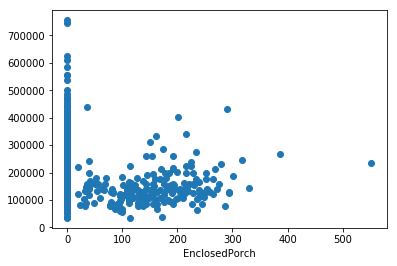

In [56]:
column_name = next(gen_continuous)
plt.scatter(housing[column_name], housing['SalePrice'])
plt.xlabel(column_name)

Text(0.5, 0, '3SsnPorch')

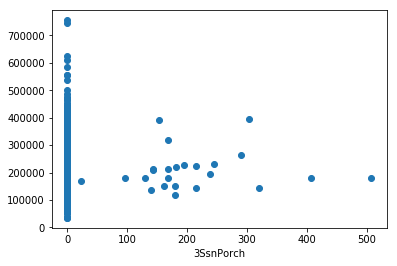

In [57]:
column_name = next(gen_continuous)
plt.scatter(housing[column_name], housing['SalePrice'])
plt.xlabel(column_name)

Text(0.5, 0, 'ScreenPorch')

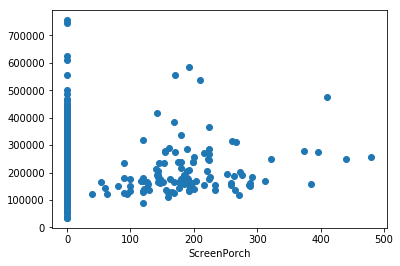

In [58]:
column_name = next(gen_continuous)
plt.scatter(housing[column_name], housing['SalePrice'])
plt.xlabel(column_name)

Text(0.5, 0, 'PoolArea')

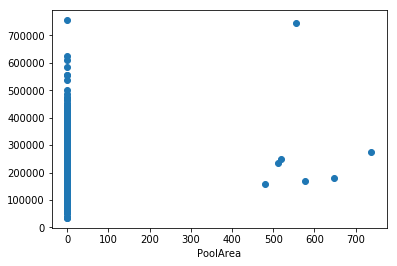

In [59]:
column_name = next(gen_continuous)
plt.scatter(housing[column_name], housing['SalePrice'])
plt.xlabel(column_name)

In [60]:
housing[(housing.PoolArea>500)&(housing.SalePrice>600000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1183,60,RL,160.000,15623,Pave,No_Alley,IR1,Lvl,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.000,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.000,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,No_MF,0,7,2007,WD,Abnorml,745000


In [61]:
outlier_id[1183] = 'PoolArea'

Text(0.5, 0, 'MiscVal')

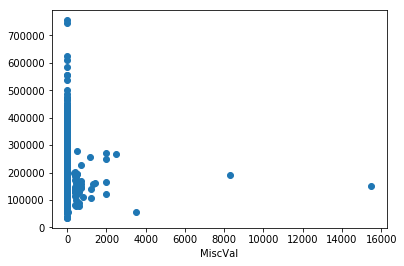

In [62]:
column_name = next(gen_continuous)
plt.scatter(housing[column_name], housing['SalePrice'])
plt.xlabel(column_name)

In [63]:
housing[housing.MiscVal>8000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
347,20,RL,76.150,12772,Pave,No_Alley,IR1,Lvl,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,8,1960,1998,Hip,CompShg,MetalSd,MetalSd,None,0.000,TA,Gd,CBlock,TA,TA,Mn,BLQ,498,Unf,0,460,GasA,TA,Y,SBrkr,958,0,0,958,0,0,1,0,2,1,TA,5,Typ,0,No_FP,Attchd,1960.000,RFn,1,301,TA,TA,Y,0,0,0,0,0,0,No_Pool,No_Fence,Gar2,15500,4,2007,WD,Normal,151500
1231,90,RL,89.328,18890,Pave,No_Alley,IR1,Lvl,Inside,Gtl,Sawyer,Feedr,RRAe,Duplex,1.5Fin,5,5,1977,1977,Shed,CompShg,Plywood,Plywood,None,1.000,TA,TA,CBlock,Gd,TA,No,GLQ,498,Rec,211,652,GasA,Ex,Y,SBrkr,1361,1259,0,2620,0,0,2,2,4,2,TA,12,Typ,1,TA,BuiltIn,1977.000,RFn,2,600,TA,TA,N,155,24,145,0,0,0,No_Pool,No_Fence,Gar2,8300,8,2007,WD,Normal,190000


not sure how to handle this MiscVal outliers since they are of type Gar2 in MiscFeature so there is a categorical element involved. going to leave in for now

Text(0.5, 0, 'YearBuilt')

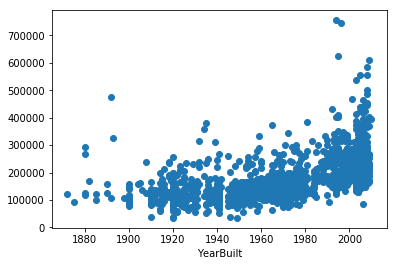

In [64]:
column_name = next(gen_continuous)
plt.scatter(housing[column_name], housing['SalePrice'])
plt.xlabel(column_name)

Text(0.5, 0, 'YearRemodAdd')

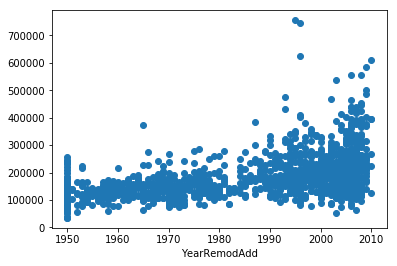

In [65]:
column_name = next(gen_continuous)
plt.scatter(housing[column_name], housing['SalePrice'])
plt.xlabel(column_name)

Text(0.5, 0, 'GarageYrBlt')

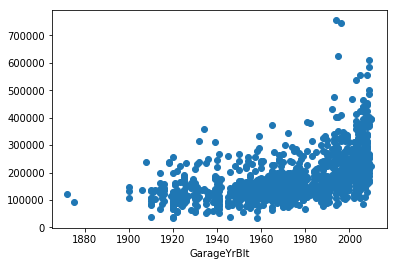

In [66]:
column_name = next(gen_continuous)
plt.scatter(housing[column_name], housing['SalePrice'])
plt.xlabel(column_name)

In [67]:
column_name = next(gen_continuous)
plt.scatter(housing[column_name], housing['SalePrice'])
plt.xlabel(column_name)

StopIteration: 

main points of concern. 
<br>
1. unclear what to do about MiscVal outliers as seen above



In [68]:
outlier_id

{935: 'LotFrontage',
 1299: ['LotFrontage', 'BsmtFinSF1', '1stFlrSF', 'GrLivArea', 'GarageArea'],
 250: 'LotArea',
 314: 'LotArea',
 336: 'LotArea',
 707: 'LotArea',
 298: 'MasVnrArea',
 1170: 'MasVnrArea',
 186: 'LowQualFinSF',
 524: 'GrLivArea',
 582: 'GarageArea',
 1062: 'GarageArea',
 1191: 'GarageArea',
 54: 'WoodDeckSF',
 496: 'OpenPorchSF',
 1183: 'PoolArea'}

In [70]:
#jimmy's list of outliers by eye test. manually placing here for easy reference in future
final_outlier_id = {935: 'LotFrontage',
                     1299: ['LotFrontage', 'BsmtFinSF1', '1stFlrSF', 'GrLivArea', 'GarageArea'],
                     250: 'LotArea',
                     314: 'LotArea',
                     336: 'LotArea',
                     707: 'LotArea',
                     298: 'MasVnrArea',
                     1170: 'MasVnrArea',
                     186: 'LowQualFinSF',
                     524: 'GrLivArea',
                     582: 'GarageArea',
                     1062: 'GarageArea',
                     1191: 'GarageArea',
                     54: 'WoodDeckSF',
                     496: 'OpenPorchSF',
                     1183: 'PoolArea'}

final_outlier_id

{935: 'LotFrontage',
 1299: ['LotFrontage', 'BsmtFinSF1', '1stFlrSF', 'GrLivArea', 'GarageArea'],
 250: 'LotArea',
 314: 'LotArea',
 336: 'LotArea',
 707: 'LotArea',
 298: 'MasVnrArea',
 1170: 'MasVnrArea',
 186: 'LowQualFinSF',
 524: 'GrLivArea',
 582: 'GarageArea',
 1062: 'GarageArea',
 1191: 'GarageArea',
 54: 'WoodDeckSF',
 496: 'OpenPorchSF',
 1183: 'PoolArea'}